 # DATA ANALYTICS II ASSIGNMENT: GROUP FOUR 
1. S084-01-2341/2021 PETER KARURI NDUNGU
2. S084-01-2342/2021 MAURINE CHEMUTAI
3. S084-01-2299/2021 SAMUEL MUTAHI
4. S084-01-2301/2021 WINROSE WANGUI
5. S084-01-2742/2021 AMOS KIPNGENO
6. S084-01-2318/2021 ERICK MUEMA


A. From the dataset given, write a detailed description of each of the variable in the datase**  
1 .Id: A unique identifier for each observation (row).  
2. SepalLengthCm: The length of the sepal in centimeters.  
3. SepalWidthCm: The width of the sepal in centimeters.  
4. PetalLengthCm: The length of the petal in centimeters.  
5. PetalWidthCm: The width of the petal in centimeters.  
6. Species: The species of the iris flower, which can be one of three categories: 'Iris-setosa', 'Iris-versicolor', or 'Iris-virginica'.  

(1) Import the necessary python libraries for data analysis and explain the use 
of each library

In [4]:
#Importing necessary Python libraries
import pandas as pd # which is used for data manipulation and analysis, and gives it the alias pd.
import numpy as np #which is used for numerical operations and array manipulations, and gives it the alias np.
import matplotlib.pyplot as plt #Imports the pyplot module from the matplotlib library for creating  visualizations, and gives it the alias plt.
import seaborn as sns #Imports the seaborn library, which is built on top of matplotlib and used for making informative statistical graphics, and gives it the alias sns.
from sklearn.preprocessing import MinMaxScaler # Imports the MinMaxScaler class from the scikit-learn library, which is used to normalize features by scaling them to a given range.
from sklearn.model_selection import train_test_split  # Imports the train_test_split function from scikit-learn, which is used to split the dataset into training and testing sets.
from sklearn.neighbors import KNeighborsClassifier #Imports the KNeighborsClassifier class from scikit-learn, which implements the k-nearest neighbors algorithm for classification tasks.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report #Imports several evaluation metrics from scikit-learn, including accuracy, precision, recall, F1 score, confusion matrix, and classification report, which are used to assess the performance of classification models.

(2) Import/Load the dataset into a pandas DataFrame.

In [5]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


3(a)Examining a few rows and the structure of the dataset,,

In [6]:
print("First few rows of the dataset:")
print(df.head(4))
print("\nStructure of the dataset:")
print(df.info())
print("\n")

First few rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa

Structure of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None




 3(b) Displaying the summary statistics,

In [7]:
print("\nSummary statistics of the dataset:")
print(df.describe())
print("\n")


Summary statistics of the dataset:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000




3(c) Determining the column names and the data types of the variables

In [8]:
print("\nColumn names and data types:")
print(df.dtypes)
print("\n")


Column names and data types:
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object




(4) Check and deal with the missing values in the dataset.

In [9]:
print("\nChecking for missing values:")
print(df.isnull().sum())
print("\n")


Checking for missing values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64




(5) Checking and handling outliers. Identify and decide on a method to handle 
outliers (discuss the options).


Boxplot analysis for outliers:


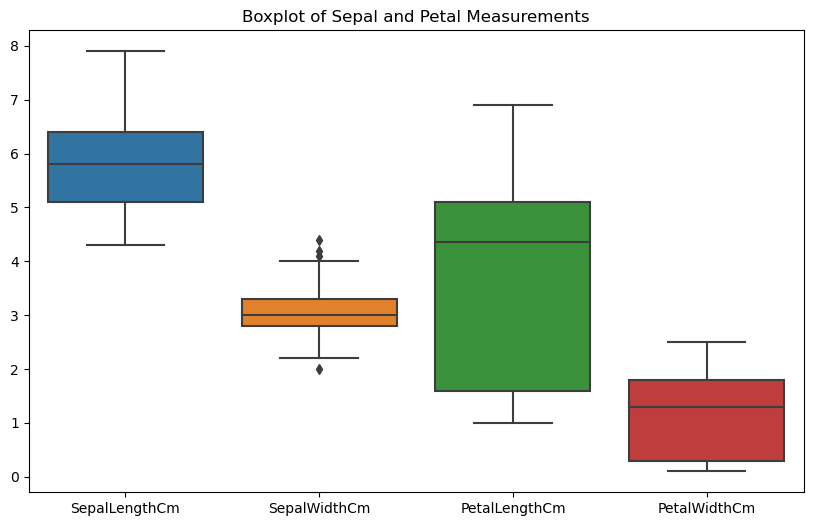

In [10]:
# Identify outliers using boxplots
print("\nBoxplot analysis for outliers:")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
plt.title('Boxplot of Sepal and Petal Measurements')
plt.show()

In [11]:
# Handling outliers by using IQR method
Q1 = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].quantile(0.25)
Q3 = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].quantile(0.75)
IQR = Q3 - Q1
IQR

SepalLengthCm    1.3
SepalWidthCm     0.5
PetalLengthCm    3.5
PetalWidthCm     1.5
dtype: float64

In [12]:
# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [13]:
# Remove outliers
filtered_df = df[~((df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] < lower_bound) | (df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] > upper_bound)).any(axis=1)]
print("\nDataset shape after removing outliers:")
print(filtered_df.shape)



Dataset shape after removing outliers:
(146, 6)


(6) Select the most relevant features and apply the necessary feature 
transformations. Discuss the available techniques and justify the choice of a 
technique

In [14]:
# Select features
selected_features = filtered_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected features
scaled_features = scaler.fit_transform(selected_features)

# Print scaled features
print("\nScaled features:")
print(scaled_features[:1])




Scaled features:
[[0.22222222 0.72222222 0.06779661 0.04166667]]


# Interpretation  of the output
* For *SepalLengthCm* the original value has been scaled to approximately 0.22222222, which means it is about 22.22% of the range of SepalLengthCm values in the dataset after scaling.  

* For *SepalWidthCm* the original value has been scaled to approximately 0.72222222, meaning it is about 72.22% of the range of SepalWidthCm values in the dataset after scaling.  

* For *PetalLengthCm* the original value has been scaled to approximately 0.06779661, indicating it is about 6.78% of the range of PetalLengthCm values in the dataset after scaling.

* *For PetalWidthCm* the original value has been scaled to approximately 0.04166667, which means it is about 4.17% of the range of PetalWidthCm values in the dataset after scaling.


# Available techniques:
# 1. StandardScaler  
* Center and scale features to have a mean of 0 and a standard deviation of 1.

**Characteristics:**  
* Centers data around 0.  
* Scales data to unit variance (standard deviation of 1).  
* Sensitive to outliers but gives equal weight to all features.  
**Use Cases:**  
* When features have different units or scales but are assumed to have a normal distribution.  
  
# 2. MinMaxScaler     
* Scale features to a specified range, typically [0, 1].  
**Characteristics:**   
* Scales each feature to the specified range.
* Preserves the relationships among data points.
* Sensitive to outliers because they can stretch the scale.

**Use Cases:**    
* When features need to be scaled to a specific range (e.g., for image pixel values, neural networks).  
* Algorithms like KNN and Gradient Descent that require normalized data ranges.  

# 3. RobustScaler
Scale features using statistics that are robust to outliers by removing the median and scaling according to the interquartile range (IQR).  
**Characteristics:**  
* Centers data using the median.  
* Scales using the IQR, making it robust to outliers.  
* Less affected by extreme values than other scalers.  
**Use Cases:**  
* When data contains significant outliers.    
# Justification for minmax scaler   
* Algorithms such as K-Nearest Neighbors (KNN), may perform better with MinMaxScaler because it preserves the distances or similarities between data points in a straightforward manner, especially when all features are on the same scale.
* Outliers are not a major concern

(7) Build and train a KNN model. Choose (with justification) an appropriate value for K.

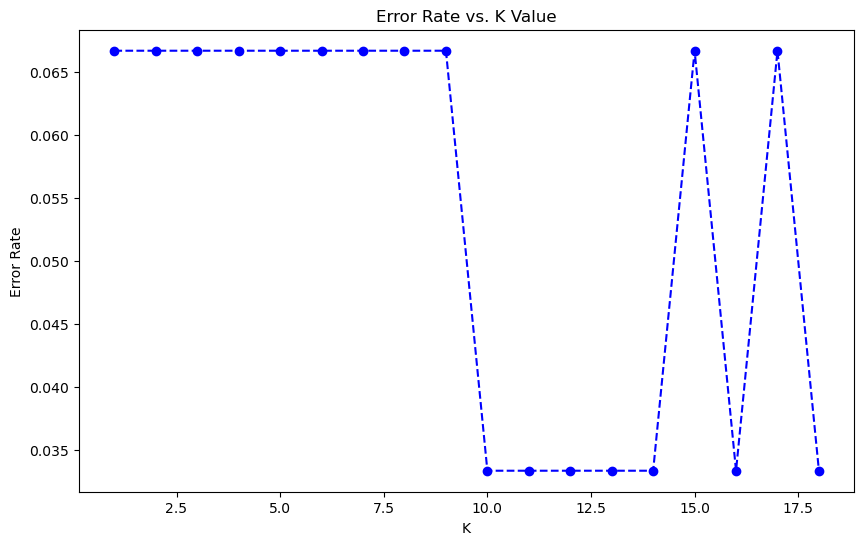

The optimal number of neighbors (K) is: 10


KNeighborsClassifier(n_neighbors=10)

In [15]:
# Split the dataset into training and testing sets
X = scaled_features
y = filtered_df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Building and training a K-Nearest Neighbors (KNN) model
error_rate = []
for k in range(1, 19):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))

# Plotting the error rate to find the optimal K
plt.figure(figsize=(10, 6))
plt.plot(range(1, 19), error_rate, marker='o', linestyle='dashed', color='blue')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
# Choosing K with the minimum error rate (from the plot)
optimal_k = error_rate.index(min(error_rate)) + 1
print(f"The optimal number of neighbors (K) is: {optimal_k}")
# Train the KNN model with optimal K
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)



**Error rate** is a metric used to evaluate the performance of a classification model, such as the k-nearest neighbors (KNN) algorithm. It represents the proportion of incorrectly classified instances among the total instances in a dataset. Essentially, it measures how often the model's predictions are wrong

(8) Use the trained model to make predictions on 5 data points in the testing set.


In [16]:
# Selecting the first 5 data points from X_test
sample_data = X_test[:5]
sample_labels = y_test[:5]  # Assuming y_test corresponds to the first 5 data points

# Making predictions using the KNN classifier
sample_predictions = knn.predict(sample_data)

# Printing predictions alongside actual labels
print("\nSample Data Predictions:")
for i, (pred, true) in enumerate(zip(sample_predictions, sample_labels)):
    print(f"Data Point {i+1}: Predicted: {pred}, Actual: {true}")



Sample Data Predictions:
Data Point 1: Predicted: Iris-setosa, Actual: Iris-setosa
Data Point 2: Predicted: Iris-virginica, Actual: Iris-virginica
Data Point 3: Predicted: Iris-setosa, Actual: Iris-setosa
Data Point 4: Predicted: Iris-setosa, Actual: Iris-setosa
Data Point 5: Predicted: Iris-setosa, Actual: Iris-setosa


9) Compute and display performance metrics (such as accuracy, precision, 
recall, F1-score and confusion matrix).

In [17]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\n")


Performance Metrics:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-Score: 0.97

Confusion Matrix:
[[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30





(10) Visualize the results (both actual and predicted values) and create visual 
summaries.

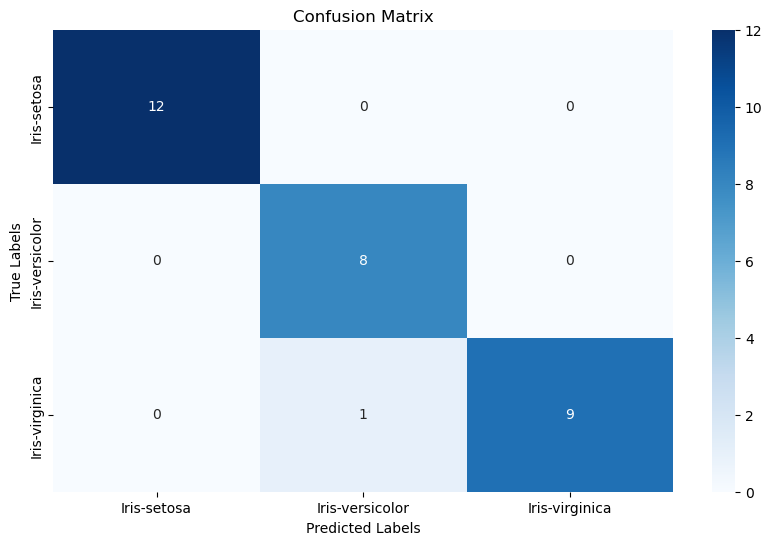

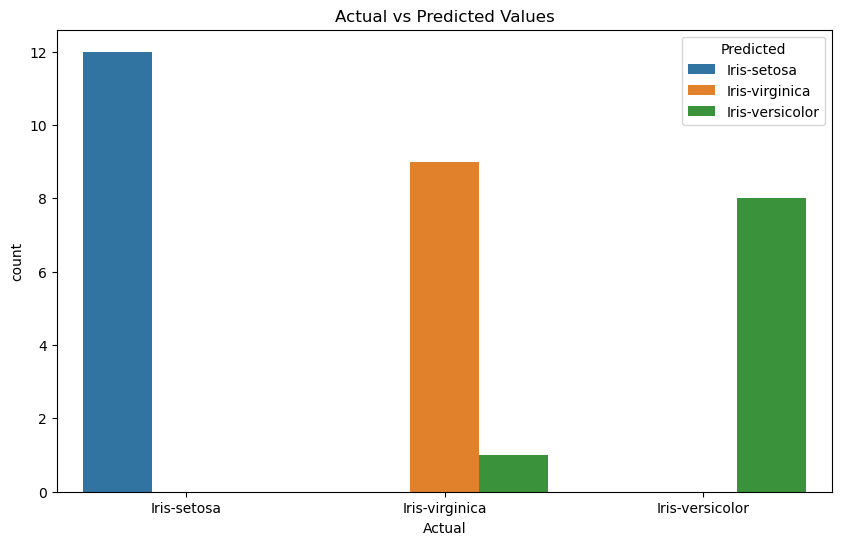

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(10, 6))
sns.countplot(x='Actual', hue='Predicted', data=comparison_df)
plt.title('Actual vs Predicted Values')
plt.show()



# 1. Accuracy(0.97)
 * Accuracy is the ratio of correctly predicted instances to the total instances.
# 2. Precision(0.97)
* Precision is the ratio of correctly predicted positive instances to the total predicted positives.
* Iris-setosa = 1.00  
* Iris-versicolor = 0.89  
* Iris-virginica = 1.00  
# 3. Recall(0.97)
* Recall  is the ratio of correctly predicted positive instances to all instances that are actually positive.
* Iris-setosa = 1.00
* Iris-versicolor = 1.00
* Iris-virginica = 0.90
# 4. F1-score(0.97)
* The F1-score (F1-measure) is a metric used to evaluate the performance of a classification model.
* Iris-setosa = 1.00
* Iris-versicolor = 0.94
* Iris-virginica = 0.95
# 5. Confusion Matrix  
* A confusion matrix is a table used to describe the performance of a classification model by showing the true positive, false positive, true negative, and false negative counts for each class.  

# Interpretation:    
  **Iris-setosa:**  
* 12 instances correctly classified as Iris-setosa.
* Precision, recall, and F1-score are all perfect at 1.00, indicating all predictions for Iris-setosa are correct.
  
**Iris-versicolor:**
* 8 instances correctly classified as Iris-versicolor.
* Precision is 0.89, indicating 89% of predictions for Iris-versicolor are correct.  
* Recall is 1.00, indicating all actual instances of Iris-versicolor were correctly identified.  
* F1-score is 0.94, which is a harmonic mean of precision and recall.
      
**Iris-virginica:**  
* 9 instances correctly classified as Iris-virginica, with 1 instance misclassified as Iris-versicolor.  
* Precision is 1.00, indicating all predictions for Iris-virginica are correct.  
* Recall is 0.90, indicating 90% of actual instances of Iris-virginica were correctly identified.  
* F1-score is 0.95, indicating a high balance between precision and recall.  